In [9]:
import os
os.chdir('/home/vagrant/ocm/language-learning/code/tensorflow-vgg')

In [10]:
%matplotlib inline


import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import matplotlib
from urllib import request
import requests
import os
from PIL import Image

import utils
import vgg16

matplotlib.style.use('ggplot')

In [11]:
img3 = utils.load_image("/home/vagrant/ocm/language-learning/data/dog/2.jpg")

In [12]:
type(img3)

numpy.ndarray

(224, 224, 3)


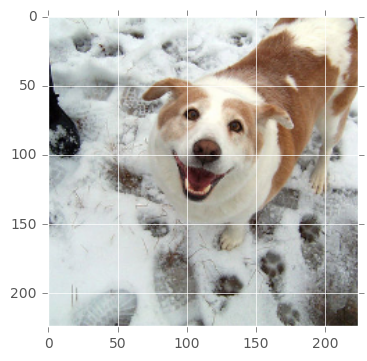

In [13]:
print(img3.shape)
plt.imshow(img3)

In [6]:
batch1 = img3.reshape((1, 224, 224, 3))

In [7]:
batch = batch1

In [8]:
with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.7)))) as sess:
    images = tf.placeholder("float", [1, 224, 224, 3])
    feed_dict = {images: batch}

    vgg = vgg16.Vgg16()
    with tf.name_scope("content_vgg"):
        vgg.build(images)

    prob = sess.run(vgg.prob, feed_dict=feed_dict)
    utils.print_prob(prob[0], './synset.txt')

/home/vagrant/ocm/language-learning/code/tensorflow-vgg/vgg16.npy
npy file loaded again
build model started
<class 'tensorflow.python.framework.ops.Tensor'> fc8 type
(1, 1000)
build model finished: 0s
Top1:  n02101388 Brittany spaniel 0.382087
Top5:  [('n02101388 Brittany spaniel', 0.38208672), ('n02113186 Cardigan, Cardigan Welsh corgi', 0.066030592), ('n02110185 Siberian husky', 0.050658513), ('n02109961 Eskimo dog, husky', 0.044835784), ('n02088364 beagle', 0.038108144)]
